In [1]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [2]:
!pip install scikit-plot

In [3]:
#LOAD THE DEPENDENCIES
import os
import PIL
import cv2
import logging
import itertools
import scikitplot
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from pickle import load
from keras import applications
from keras import backend as K
from keras.preprocessing import image
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_log_error
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

#PREVENT ERROR UNCESSARY MESSAGES
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
#LOAD THE DATA
# Training Data split 70% training and 30% validation

train_data_dir = "/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Test/train"
validation_data_dir = "/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Test/val"
test_data_dir = "/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Test/test"


# THE INPUT LAYER IS THE SAME AS IT WILL BE FUSED AS ONE LATER ON
img_rows, img_cols = 224, 224
input_shape = (img_rows,img_cols,3)
model_input = Input(shape=input_shape)
print("Data folders found!")
print("The Input size is set to ", model_input)

Data folders found!
The Input size is set to  KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [5]:
#HYPER-PARAMETERS USED NO NEED TO CHANGE. MAKE SURE IT MATCHES WITH YOUR TRAINED MODEL.
#THIS IS MAINLY FOR PLOTTING PURPOSES ONLY

batch_size = 16

epochs = 50

print("Batch Size is set to:", batch_size)
print("Epoch is set to:", epochs)
print()
print("Make sure it matches with your trained model before proceeding to prevent problems")

Batch Size is set to: 16
Epoch is set to: 50

Make sure it matches with your trained model before proceeding to prevent problems


In [6]:
from IPython.testing import test
#DATA GENERATORS
val_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 42,
        shuffle=False,
        classes=['Bacterialblight', 'Blast','Brownspot','Tungro'])

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 42,
        shuffle=False,
        classes=['Bacterialblight', 'Blast','Brownspot','Tungro'])

#CHECK  THE NUMBER OF SAMPLES
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)

print("Validation samples:", nb_validation_samples)
print("Test samples:", nb_test_samples)

if nb_validation_samples == 0:
    print("NO DATA VALIDATION FOUND! Please check your validation data path and folders!")
    print("Check the data folders first!")
else:
    print("Validation samples found!")

if nb_test_samples == 0:
    print("NO DATA TEST FOUND! Please check your test data path and folders!")
    print("Check the data folders first!")
else:
    print("Test samples found!")

#check the class indices
validation_generator.class_indices
test_generator.class_indices

#true labels
Y_test=test_generator.classes
test_labels = test_generator.classes

num_classes= len(test_generator.class_indices)

print('Model set to train', num_classes, 'classes')

if nb_validation_samples and nb_test_samples > 0:
    print("Generators are set!")
    print("Check if dataset is complete and has no problems before proceeding.")



Found 1185 images belonging to 4 classes.
Found 597 images belonging to 4 classes.
Validation samples: 1185
Test samples: 597
Validation samples found!
Test samples found!
Model set to train 4 classes
Generators are set!
Check if dataset is complete and has no problems before proceeding.


In [7]:
#LOAD THE TRAINED MODEL USING  THE model_trainer.ipynb

history = load(open('/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/History/model.pkl', 'rb'))
model = load_model('/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/Weights/model.h5')
model.summary()

Model: "Ensemble"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2_DCNN_A_DCNN_B_DCNN  [(None, 224, 224, 3)]        0         []                            
 _C_DCNN_A_DCNN_B_DCNN_C (I                                                                       
 nputLayer)                                                                                       
                                                                                                  
 rescaling_2_DCNN_A (Rescal  (None, 224, 224, 3)          0         ['input_2_DCNN_A_DCNN_B_DCNN_C
 ing)                                                               _DCNN_A_DCNN_B_DCNN_C[0][0]'] 
                                                                                                  
 normalization_1_DCNN_A (No  (None, 224, 224, 3)          7         ['rescaling_2_DCNN_A[0]

In [10]:
#VISUAL CUSTOMIZER

marker_t = '^'
marker_v = '+'
market_t_loss = 'v'
market_v_loss = 'x'
markersize = 5
fillstyle_t = 'none'
fillstyle_v = 'none'

color_t = 'blue'
color_v = 'orange'

labelsize = 10

color_t_loss = 'green'
color_v_loss = 'red'

border_pad = 0.5
legend_font_size = 9

ls_t = '-'
ls_v = '--'
lw_t = '1.5'
lw_v = '1.5'

print("You may change the values if needed for the ease of your evaluation")

You may change the values if needed for the ease of your evaluation


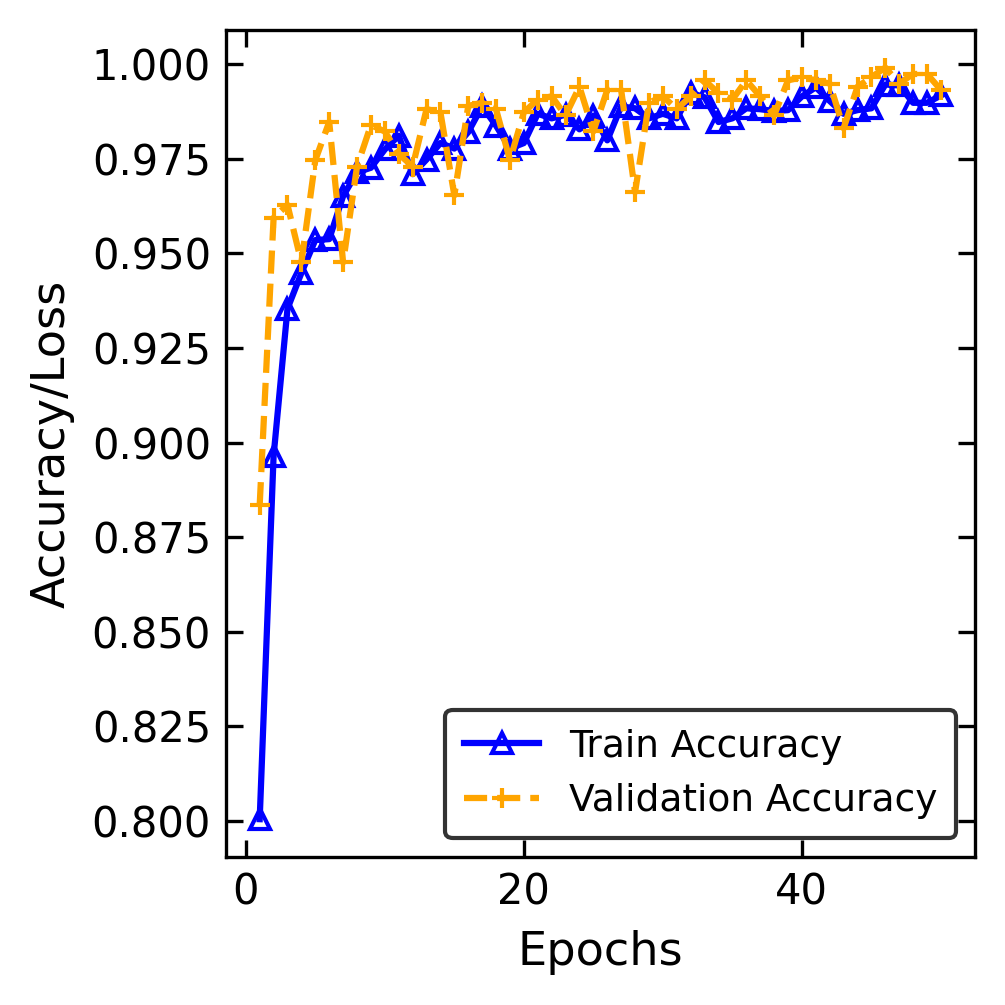

In [16]:
#PRINTS THE ACCURACY GROWTH

N = epochs
plt.style.use("default")
plt.figure(figsize=(1.15*3,1.15*3), dpi=300, edgecolor='black', facecolor='white', linewidth=0)
plt.tight_layout()

plt.gcf().subplots_adjust(bottom=0.15)

plt.rc('xtick',labelsize=labelsize, direction="in" )
plt.rc('ytick', labelsize=labelsize, direction="in")
plt.tick_params(length=4, right=True, top=True)

plt.plot(np.arange(1, N+1), history.history["accuracy"], color=color_t,lw=lw_t, marker=marker_t, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], color=color_v ,lw=lw_v, marker=marker_v, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Accuracy")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Accuracy/Loss", fontsize=3.7*3, color='black')
plt.legend(loc="lower right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/Figure/1-accuracy.jpg", bbox_inches='tight', dpi=800)


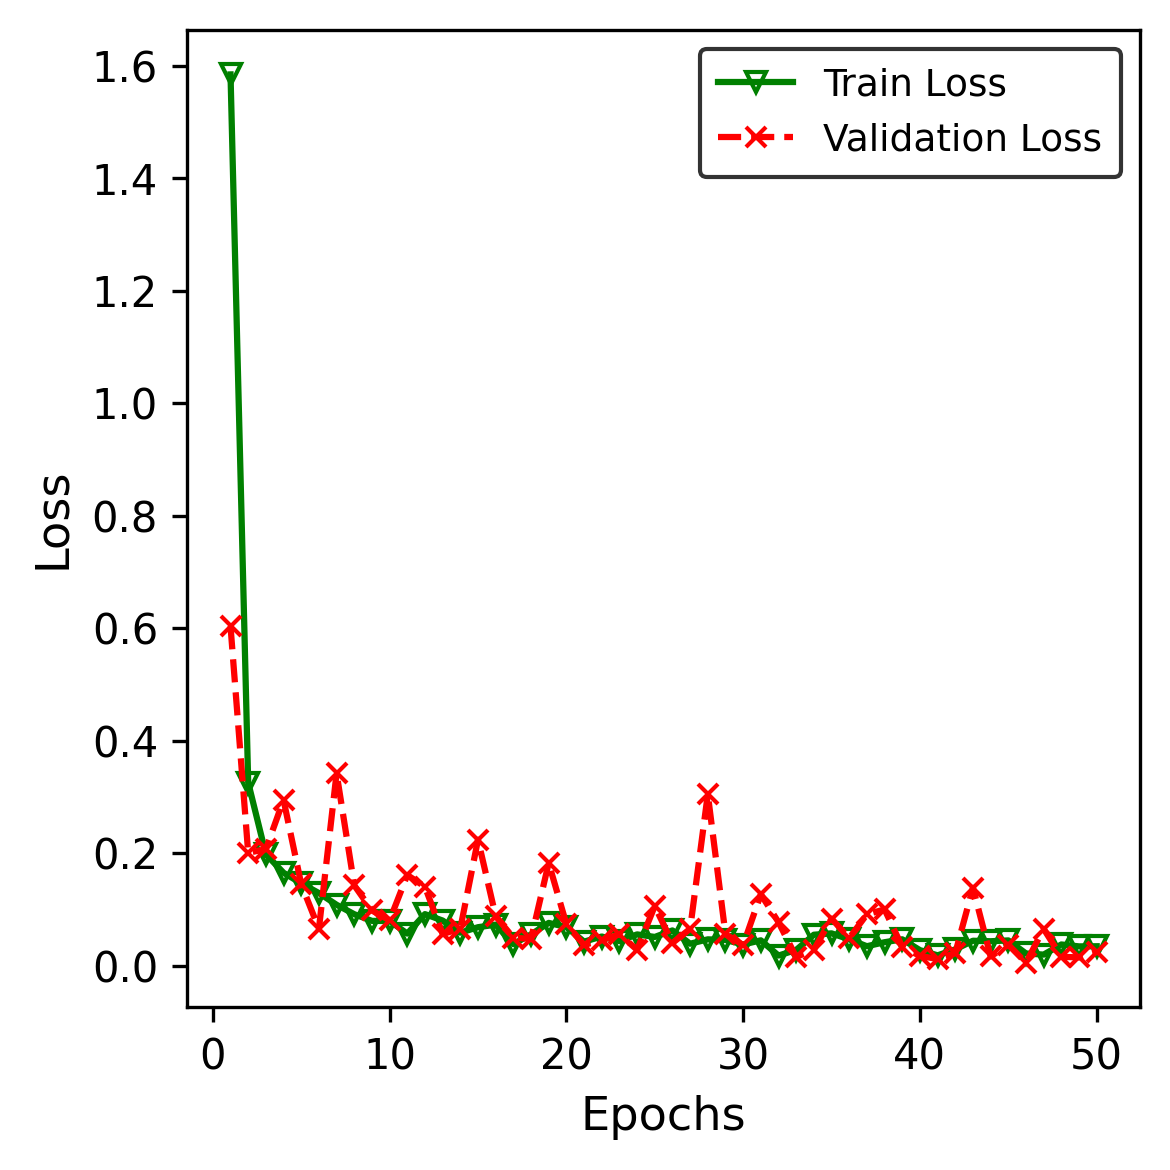

In [17]:
#PRINTS THE DECREASE OF LOSS

N = epochs
plt.style.use("default")
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.arange(1, N+1), history.history["loss"], color=color_t_loss,lw=lw_t, marker=market_t_loss, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], color=color_v_loss,lw=lw_v, marker=market_v_loss, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Loss")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Loss", fontsize=3.7*3, color='black')
plt.legend(loc="upper right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/Figure/2-Loss.jpg", bbox_inches='tight', dpi=800)


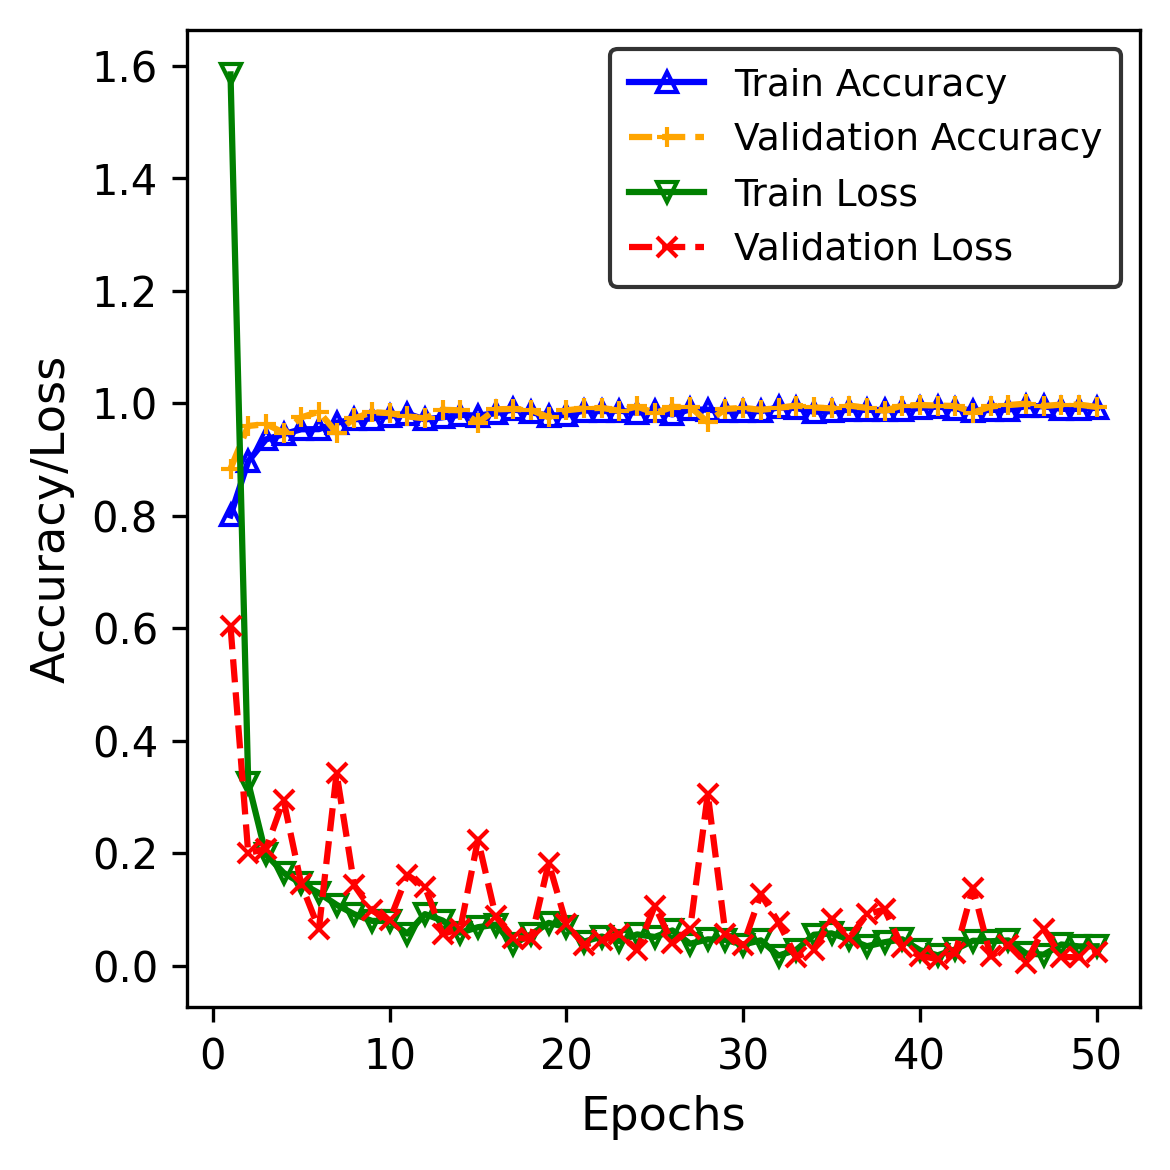

In [20]:
#PRINTS BOTH ACCURACY AND LOSS IN ONE GRAPH

N = epochs
plt.style.use("default")
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.arange(1, N+1), history.history["accuracy"], color=color_t,lw=lw_t, marker=marker_t, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], color=color_v ,lw=lw_v, marker=marker_v, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Accuracy")
plt.plot(np.arange(1, N+1), history.history["loss"], color=color_t_loss,lw=lw_t, marker=market_t_loss, markersize=markersize, fillstyle=fillstyle_t, ls=ls_t, label="Train Loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], color=color_v_loss,lw=lw_v, marker=market_v_loss, markersize= markersize, fillstyle=fillstyle_v, ls=ls_v,  label="Validation Loss")

plt.xlabel("Epochs", fontsize=3.7*3, color='black')
plt.ylabel("Accuracy/Loss", fontsize=3.7*3, color='black')
plt.legend(loc="upper right", fontsize=legend_font_size, edgecolor='black', borderpad=border_pad)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/Figure/3-AccuracyLoss.jpg", bbox_inches='tight', dpi=800)

In [21]:
#EVALUATION FOR THE FUSED-DENSENET-TINY

#evaluate accuracy
y_pred = model.predict_generator(test_generator,
                                               nb_test_samples/batch_size, workers=1)
accuracy = accuracy_score(Y_test,y_pred.argmax(axis=-1))
print('The accuracy of the Ensemble model is: ', accuracy)

#evaluate mean squared error
mse = mean_squared_error(Y_test,y_pred.argmax(axis=-1))
print('The Mean Squared Error of the Ensemble model is: ', mse)

#evaluate mean squared log error
msle = mean_squared_log_error(Y_test,y_pred.argmax(axis=-1))
print('The Mean Squared Log Error of the Ensemble model is: ', msle)

<ipython-input-21-89a51f5423a9>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator,


The accuracy of the Ensemble model is:  0.9949748743718593
The Mean Squared Error of the Ensemble model is:  0.005025125628140704
The Mean Squared Log Error of the Ensemble model is:  0.002414336753357796


                 precision    recall  f1-score   support

Bacterialblight     0.9816    1.0000    0.9907       160
          Blast     1.0000    0.9793    0.9895       145
      Brownspot     1.0000    1.0000    1.0000       160
         Tungro     1.0000    1.0000    1.0000       132

       accuracy                         0.9950       597
      macro avg     0.9954    0.9948    0.9951       597
   weighted avg     0.9951    0.9950    0.9950       597

Confusion matrix, without normalization
[[160   0   0   0]
 [  3 142   0   0]
 [  0   0 160   0]
 [  0   0   0 132]]


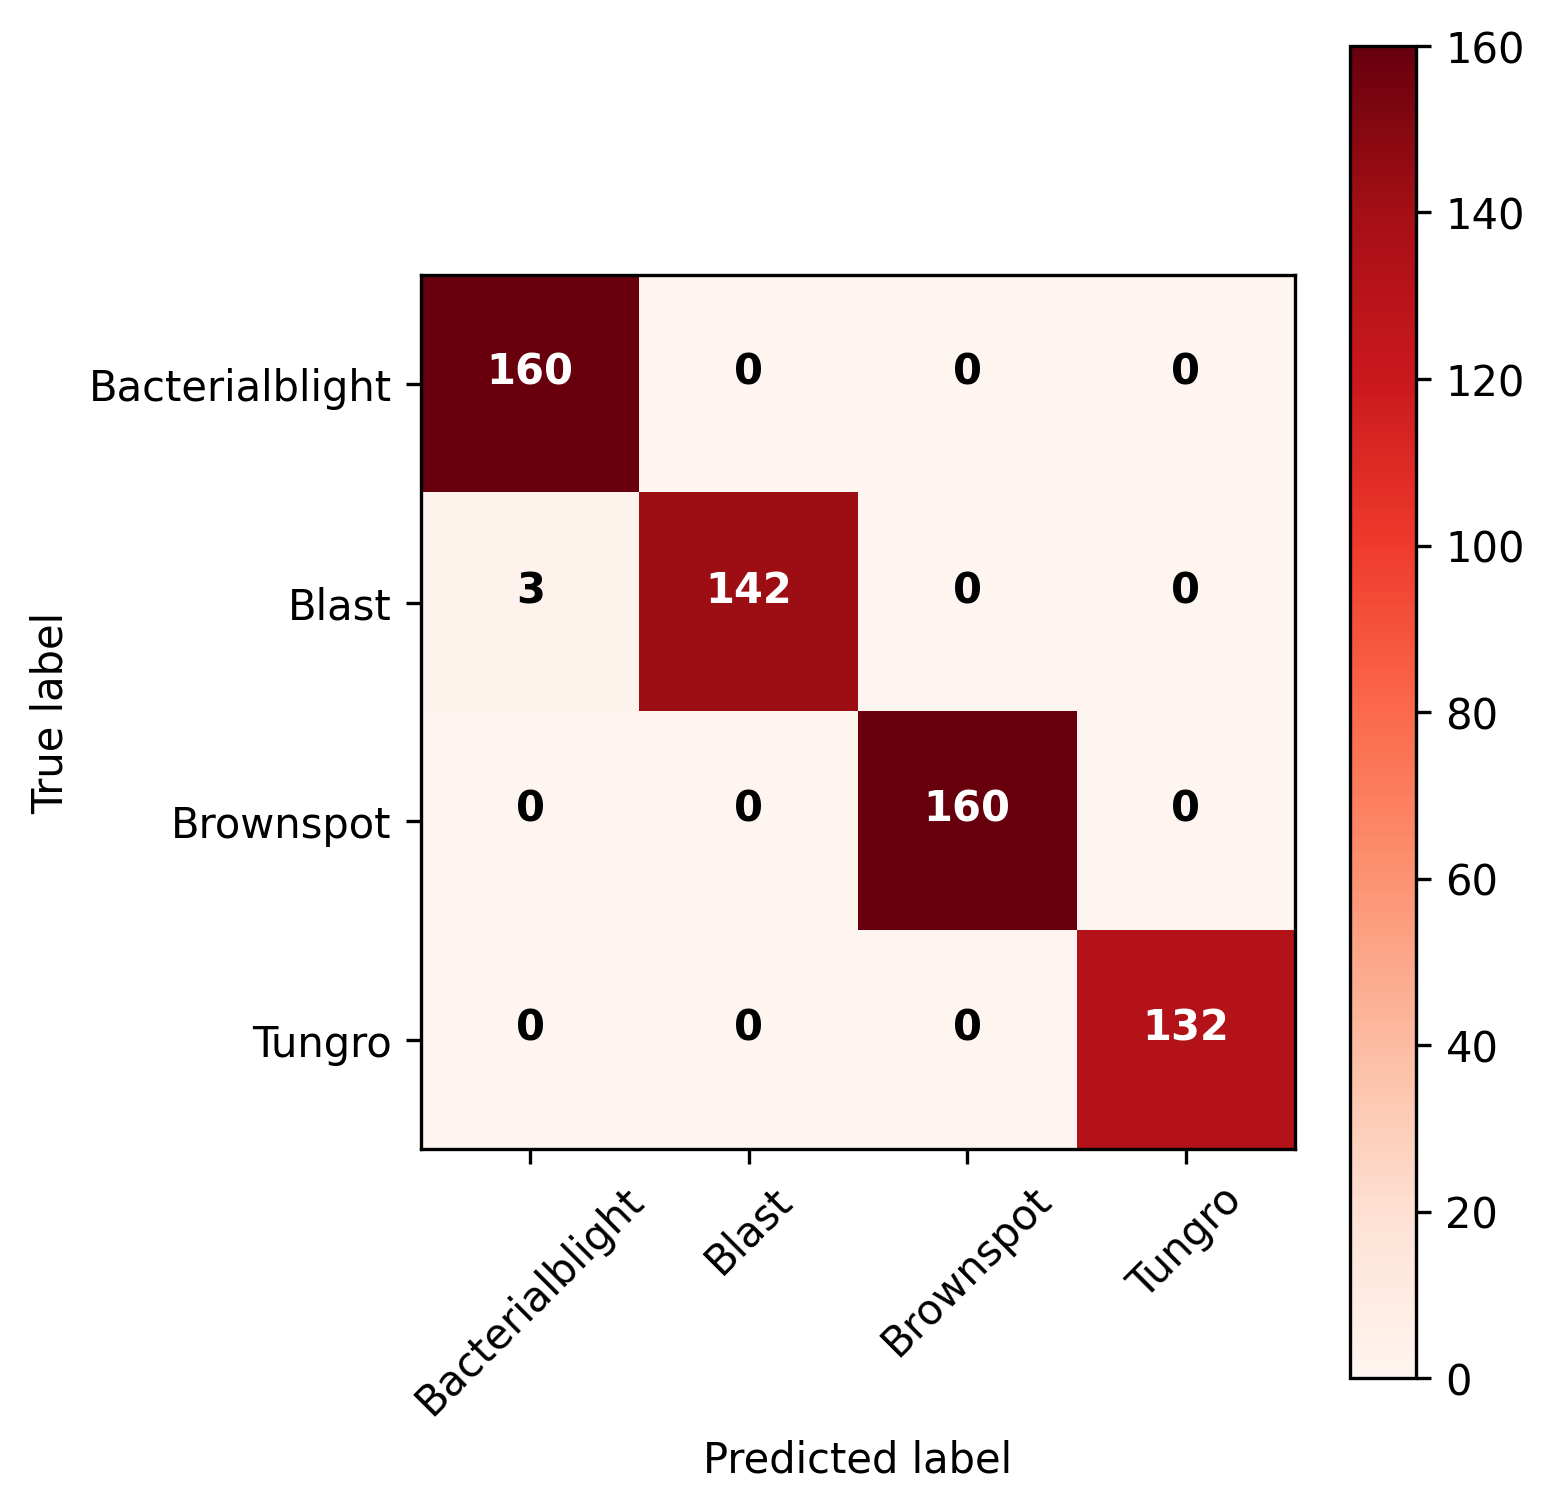

<Figure size 640x480 with 0 Axes>

In [25]:
# CONFUSION MATRIX

def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%% print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']
print(classification_report(Y_test,y_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,y_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25,5.25), dpi=300)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.tight_layout()
plt.show()

plt.savefig("/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/Figure/4-confusion_matrix.jpg", bbox_inches='tight', dpi=800)

                 precision    recall  f1-score   support

Bacterialblight     0.9816    1.0000    0.9907       160
          Blast     1.0000    0.9793    0.9895       145
      Brownspot     1.0000    1.0000    1.0000       160
         Tungro     1.0000    1.0000    1.0000       132

       accuracy                         0.9950       597
      macro avg     0.9954    0.9948    0.9951       597
   weighted avg     0.9951    0.9950    0.9950       597

Normalized confusion matrix
[[1.     0.     0.     0.    ]
 [0.0207 0.9793 0.     0.    ]
 [0.     0.     1.     0.    ]
 [0.     0.     0.     1.    ]]


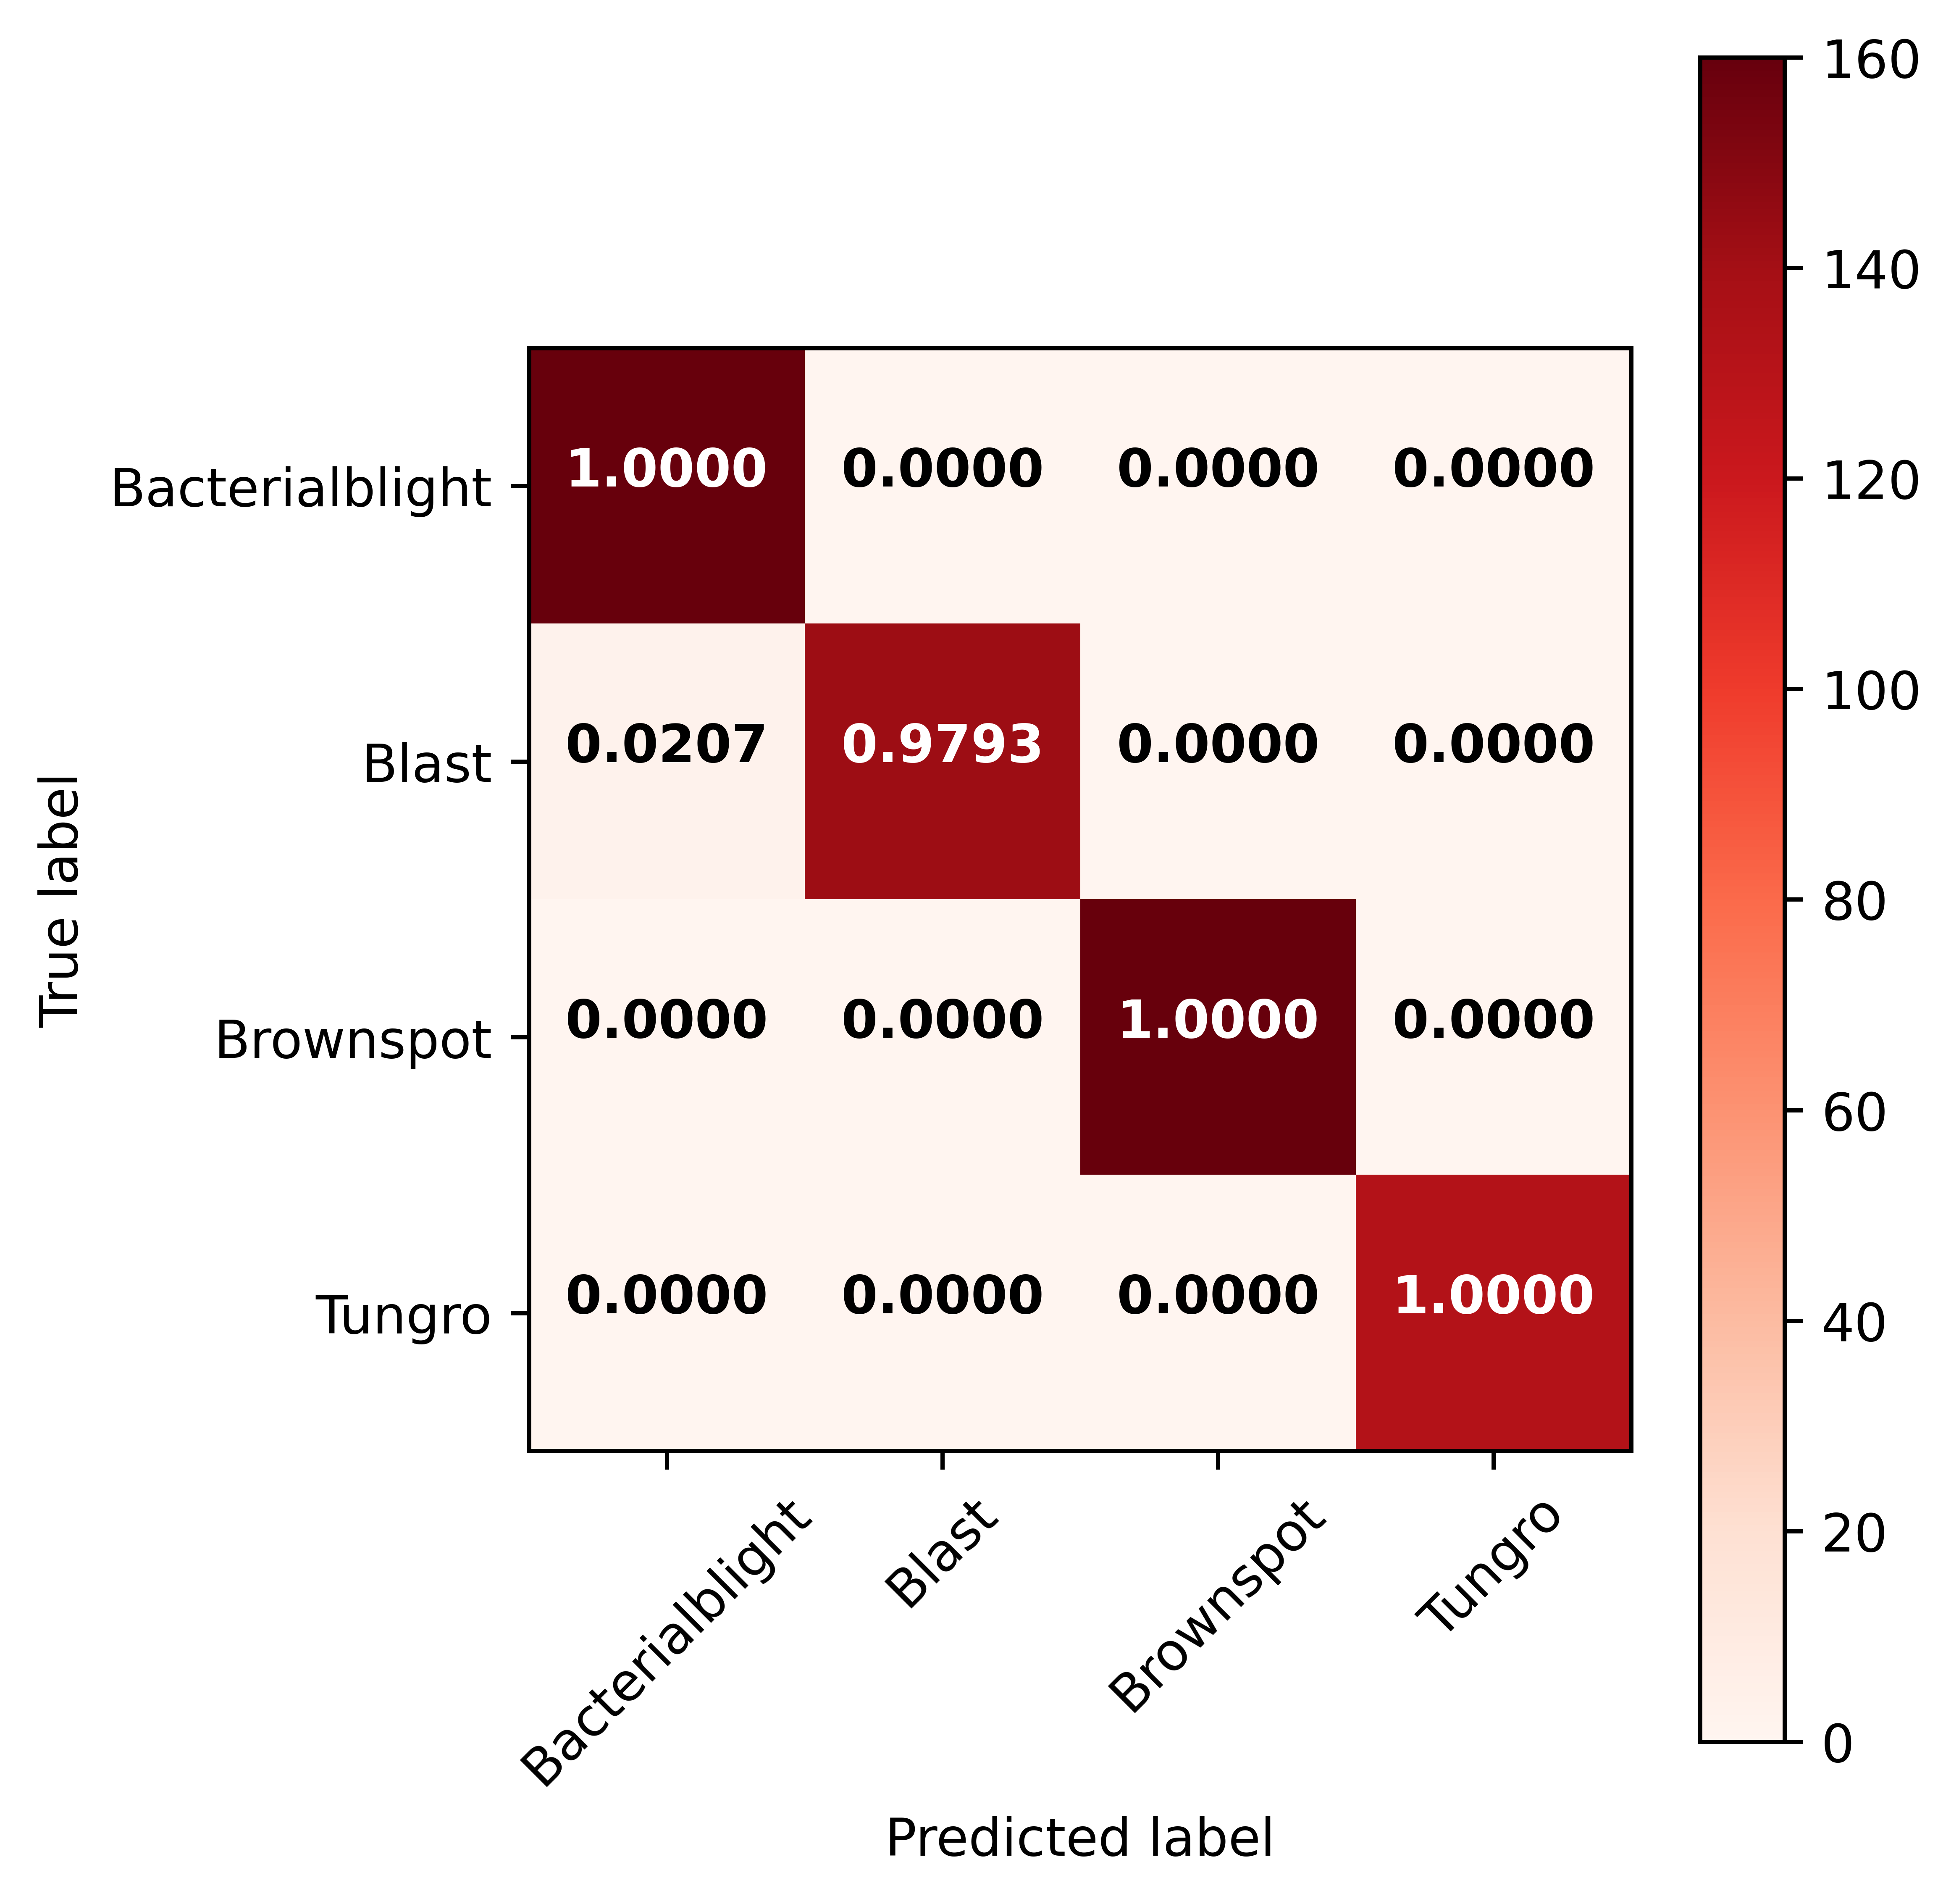

<Figure size 640x480 with 0 Axes>

In [31]:
# custom function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True, #if true all values in confusion matrix is between 0 and 1
                          title='',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.4f'), weight='bold',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%% print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']
print(classification_report(Y_test,y_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,y_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25,5.25), dpi=900)
plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.tight_layout()

plt.show()

plt.savefig("/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/Figure/5-confusion matrix-normalized.jpg", bbox_inches='tight', dpi=800)

38/38 [==============================] - 5s 120ms/step


<Figure size 6400x6400 with 0 Axes>

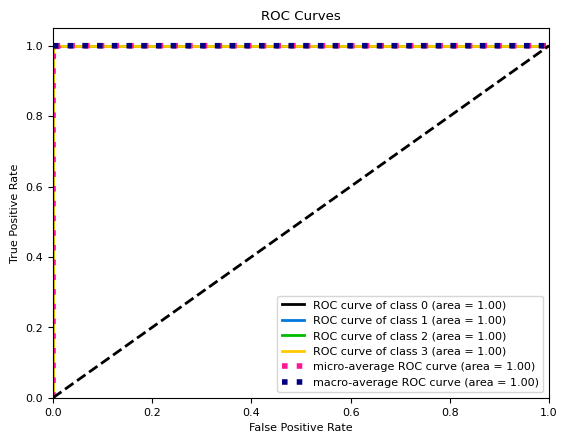

<Figure size 640x480 with 0 Axes>

In [29]:
#PRINT THE ROC CURVE

plt.figure(figsize=(8,8), dpi=800)
plt.rcParams.update({'font.size': 8})
y_probas = model.predict(test_generator)
scikitplot.metrics.plot_roc(Y_test, y_pred)

plt.show()

plt.savefig("/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/Figure/6-ROC curve.jpg", bbox_inches='tight', dpi=800)

38/38 [==============================] - 4s 105ms/step


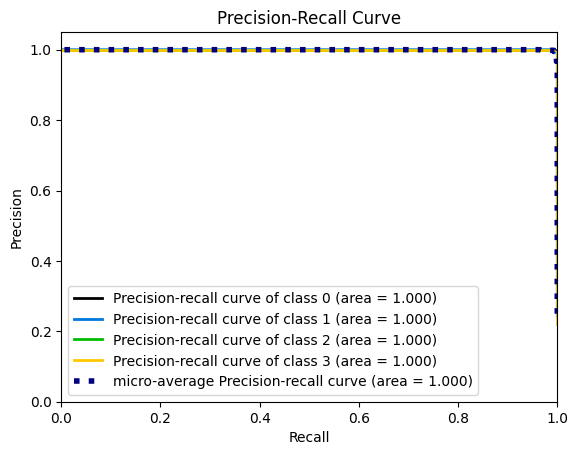

<Figure size 16000x16000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
#PRINT THE P-R CURVE

plt.rcParams.update({'font.size': 10})
y_probas = model.predict(test_generator)
scikitplot.metrics.plot_precision_recall(Y_test, y_pred)

plt.figure(figsize=(20, 20), dpi=800)
plt.show()

plt.savefig("/content/drive/MyDrive/Rice Leaf Diseases/Rice leaf (70% 20% 10%)/Epoch 50 Batch size 16/Figure/7-P-R CURVE.jpg", bbox_inches='tight', dpi=800)